# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats


df = pd.read_csv('data/human_body_temperature.csv')

# Question 1: Is the distribtuon of body temperature normal?

In [34]:
# quick look at the data

df.head (10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


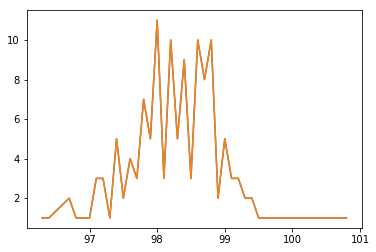

In [26]:
#look at the frequency plot the temperatures
freq_temp= df.groupby(by=df.temperature).count()
plt.plot(freq_temp)


In [21]:
#run a shapiro test on data
#returs W(test statistic), p-value (for null hypothesis: distoribution is normal)
#W should be greater than 9 or the p should be greater tha .05 for normality to be expected
scipy.stats.shapiro(df.temperature, a=None, reta=False)

(0.9865769743919373, 0.2331680953502655)

### Answer 1: Visual and statistical tests indicate the temperature data are normally distribtued

# Question 2: Is the sample size large? Are the observations independent? 

In [24]:
#sample size n >30 use Z statistic, <30 use t statistic

#count the number of temperature data points to get sample size
n= df.temperature.count()
n

130

In [ ]:
"""when using an ANOVA to do hypothesis testing between populations
it is important to check the heterogenity of variance 
as well as normality and independence. heterogenity of variance can be 
tested using the Levene test"""

In [43]:
#levene test will be important when temperature is looked at by gender

#subset data by gender
female= df.temperature[df.gender =="F"]
male= df.temperature[df.gender=="M"] 

#Levene Test returs W(test statistic), p-value (for null hypothesis: equal variances)
scipy.stats.levene(female, male)

LeveneResult(statistic=0.063549512920251613, pvalue=0.8013756068102883)

### Answer 2: The sample size is 130, which is considered large. Without knowledge of how the samples were taken it is assumed that each temperature measurement is independent of the others. 

# Question 3:   
    A. Is the true population mean really 98.6 degrees F?  
    B. Would you use a one-sample or two-sample test? Why?  
    C. In this situation, is it appropriate to use the tt or zz statistic?  
    D. Now try using the other test. How is the result be different? Why? 

In [119]:
#3A using resampling
#hyposthesis = population mean is 98.6 
#what is the probability the true mean is 98.6 given our sample data?

print( "The sample mean is", str(df.temperature.mean()))

the sample mean is 98.24923076923078


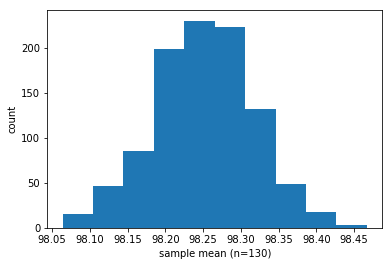

In [208]:
#get class from Allen Downey tutorial "CompStats" to bootstrap our sample
def make_sample(n=130):
    sample = df.temperature.sample(n, replace=True)
    return sample

def sample_stat(sample):
    return sample.mean()

def compute_sample_statistics(n=130, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return np.array(stats)

sample_means = compute_sample_statistics(n=130, iters=1000)

plt.hist(sample_means)
plt.xlabel('sample mean (n=130)')
plt.ylabel('count')
None

In [155]:
print ("The mean of the sample mean distribtuion is", str(sample_means.mean()), "and the standard error is",  
       str(sample_means.std()))

The mean of the sample mean distribtuion is 98.2492746154 and the standard error is 0.0658058276542


In [156]:
mean1 = sample_means.mean()
SE = sample_means.std()
mm= (98.6 - mean1)/SE

print ("98.6 is", str(mm), "standard devations away from the mean")


98.6 is 5.32970098725 standard devations away from the mean


In [185]:
print( "Using resampling, the likelihood of getting a mean of 98.6, given our sample is", str(1-scipy.special.ndtr(mm)) )

Using resampling, the likelihood of getting a mean of 98.6, given our sample is 4.91872987896e-08


In [188]:
#3A using z-stat 1 tail test
a = np.array(df.temperature)
x= a.mean()
sd= a.std(ddof=1)
z= (x-98.6) / sd

print( "Using Z-statistic, the likelihood of getting our sample mean given a true population mean of 98.6 is ", str(scipy.stats.norm.sf(z)))

#3A using t-test 1 sample
#scipy.stats.ttest_1samp(a=a, popmean=98.6)

Using Z-statistic, the likelihood of getting a mean of 98.6, given our sample is 0.683824225169


In [ ]:
#3D using a two-sample z test, between Males and Females
#hypothesis, there is not difference in average body temperuture between males nad females

In [199]:
#setting up variables
fmean= female.mean()
mmean= male.mean()
diffmean=(fmean-mmean)
fSE = scipy.stats.sem(female, ddof=1)
mSE = scipy.stats.sem(male, ddof=1)
diffSE= ((fSE**2)+(mSE**2))**.5

In [203]:
#calcualte two sample z- score

z= (diffmean - 0)/diffSE
p= scipy.stats.norm.sf(z)

print( "Using Z-statistic, the probability of getting a difference between male and female body temperature of ",
      str(diffmean), "is", str(p))


Using Z-statistic, the likelihood of getting a difference between male and female body temperature of  0.289230769230727 is 0.0111436803803


### Answer 3:  
    A. Using a reampling method, it is very unlikely the true mean of body temperature is 98.6. However, calcuating a Z -statistic shows that there is a 68% likeihood of getting our sample mean given a true population mean of 98.6
    B. I used a one sample z-test because we are using the entire population as our pool. I could use a two-sample test to investigate if Females and Males have the same body temperature on average.
    C. In this situation it is appropriate to use a Z statistic becuase the sample size is larger than 30.
    D. Using a two-sample test compares the diffence in body temperatures between males and females. My analysis indicates it is likely that there is a difference between average male and female body temperature.
    

# Question 4: At what temperature should we consider someone's temperature to be "abnormal"? 

In [211]:
#caclulate a 95% confidence interval around the sample mean
mean= a.mean()
sigma = a.std(ddof=1)
conf_int68 = scipy.stats.norm.interval(0.68, loc=mean, scale=sigma)
conf_int95 = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int68, conf_int95

((97.520110997882298, 98.9783505405792),
 (96.812218185403083, 99.686243353058416))

### Answer 4: An abnormal temperature is below 97.5 and above 99.0. A very abnormal temperature is below 96.8 and above 99.7 degrees F

# Question 5: Is there a significant difference between males and females in normal temperature?  
    A. What test did you use and why?  
    B. Write a story with your conclusion in the context of the original problem. 

In [213]:
#Q5 using a two-sample z test, between Males and Females
#hypothesis, there is not difference in average body temperuture between males nad females
#setting up variables
fmean= female.mean()
mmean= male.mean()
diffmean=(fmean-mmean)
fSE = scipy.stats.sem(female, ddof=1)
mSE = scipy.stats.sem(male, ddof=1)
diffSE= ((fSE**2)+(mSE**2))**.5

#calcualte two sample z- score

z= (diffmean - 0)/diffSE
p= scipy.stats.norm.sf(z)

print( "Using Z-statistic, the probability of getting a difference between male and female body temperature of ",
      str(diffmean), "is", str(p))


Using Z-statistic, the probability of getting a difference between male and female body temperature of  0.289230769230727 is 0.0111436803803


In [214]:
#Q5 using anova
scipy.stats.f_oneway(female, male)  


F_onewayResult(statistic=5.2232110282402724, pvalue=0.023931883122395092)

In [215]:
print ("female average", str(fmean), " and male average", str(mmean))

female average 98.39384615384613  and male average 98.1046153846154


### Answer 5:   
  A. It is very likely that there is a difference in average body temperature between men and women. I used a two-sample z test and an ANOVA to check this.    
  B. The original problem was to investigate the data based on the assumption that the average body temperature of all people is 98.6  degrees F. With the sample data provided, it is unlikey that the average temperature is 98.6, even when split between males and females the average temperatures of each group are a few tenths of a degree lower than 98.6. However, with a small sample size, 98.6 could easily be obtained as an average. Given the sample of 130 people, the confidence internal of 95% includes means all the way up to 99.7 degrees F.